# Introduction to Qiskit 🎉

<div>
<img src="./images/qiskit.png" width="500"/>
</div>

### Qiskit is a python framework for the simulation of quantum algorithms

# How to install it?

## Some useful links:
Installation guide https://docs.quantum.ibm.com/guides/install-qiskit 

Github repository https://github.com/Qiskit/qiskit 

IBM Quantum Platform https://quantum.ibm.com

IBM Quantum Composer https://quantum.ibm.com/composer/

In [1]:
%pip install qiskit qiskit-ibm-runtime qiskit_aer 'qiskit[visualization]'

  Using cached qiskit_ibm_runtime-0.36.1-py3-none-any.whl.metadata (20 kB)
  Using cached rustworkx-0.16.0-cp39-abi3-macosx_11_0_arm64.whl.metadata (10 kB)
  Using cached numpy-2.2.3-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached scipy-1.15.2-cp312-cp312-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached sympy-1.13.3-py3-none-any.whl.metadata (12 kB)
  Using cached dill-0.3.9-py3-none-any.whl.metadata (10 kB)
  Using cached stevedore-5.4.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached symengine-0.13.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (1.2 kB)
  Using cached requests_ntlm-1.3.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached pydantic-2.9.2-py3-none-any.whl.metadata (149 kB)
  Using cached matplotlib-3.10.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached pydot-3.0.4-py3-none-any.whl.metadata (10 kB)
  Using cached pillow-11.1.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.1 kB)
  Using cached pylatexenc-2.10-py3-none-any.whl
  Usin

In [5]:
%pip install pylatexenc

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import qiskit
qiskit.version.__version__

'2.1.2'

### How to run a circuit?

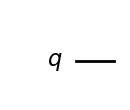

In [2]:
from qiskit import QuantumCircuit, QuantumRegister

q = QuantumRegister(1, 'q')
qc = QuantumCircuit(q)

qc.draw('mpl')

In [3]:
from qiskit_aer import AerSimulator

try: 
    simulator = AerSimulator()
    result = simulator.run(qc, shots=1024).result()
    counts = result.get_counts()
except Exception:
    print("Something is missing..")

Something is missing..


### Questions
- What did we forget?
- What is the initial value of qubit 'q'?


In [4]:
from qiskit import ClassicalRegister
c_q = ClassicalRegister(1, 'c_q')
qc = QuantumCircuit(q, c_q)
qc.measure(q, c_q)

try: 
    simulator = AerSimulator()
    result = simulator.run(qc, shots=1024).result()
    counts = result.get_counts()
except Exception:
    print("Something is missing..")

In [5]:
counts 

{'0': 1024}

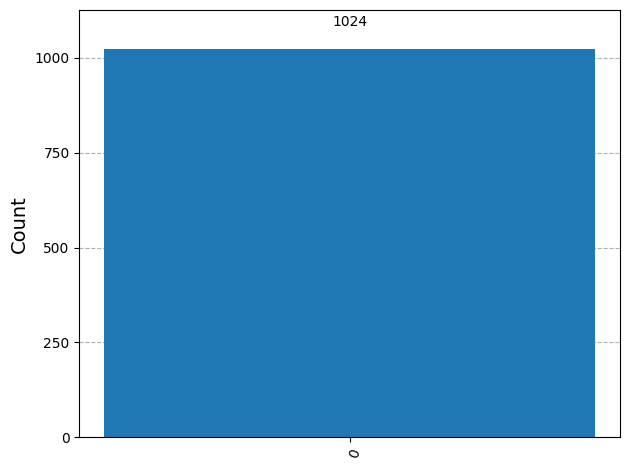

In [6]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

### How can we visualize a circuit? 2 ways!
- But first, let's make the things interesting using quantum gates!

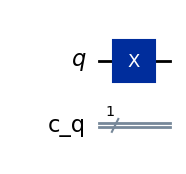

In [7]:
from qiskit.circuit.library import XGate

q = QuantumRegister(1, 'q')
c_q = ClassicalRegister(1, 'c_q')

qc = QuantumCircuit(q, c_q)

qc.append(XGate(), q)

qc.draw('mpl')

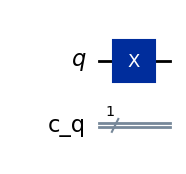

In [8]:
q = QuantumRegister(1, 'q')
c_q = ClassicalRegister(1, 'c_q')

qc = QuantumCircuit(q, c_q)

qc.x(0)

qc.draw('mpl')

### 1) Matrix representation

In [9]:
from qiskit.quantum_info import Operator

operator = Operator(qc)
matrix = operator.data
print(matrix)

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


### 2) Circuit representation

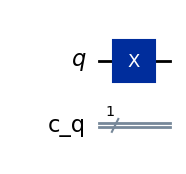

In [10]:
qc.draw('mpl')

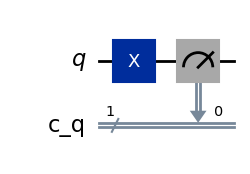

In [11]:
qc.measure(q, c_q)
qc.draw('mpl')

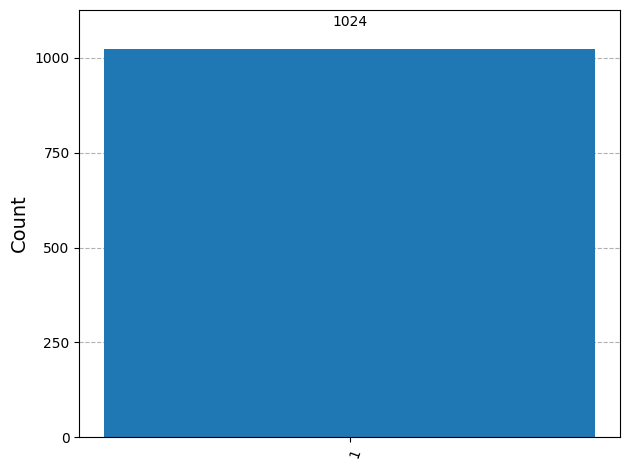

In [12]:
simulator = AerSimulator()
result = simulator.run(qc, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)

## The statevector simulator 

In [13]:
from qiskit_aer import StatevectorSimulator

q = QuantumRegister(1, 'q')
c_q = ClassicalRegister(1, 'c_q')

qc = QuantumCircuit(q, c_q)

qc.x(0)

simulator = StatevectorSimulator()
result = simulator.run(qc).result()
statevector = result.get_statevector()

print(statevector)

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


### Again, let's visualize it!

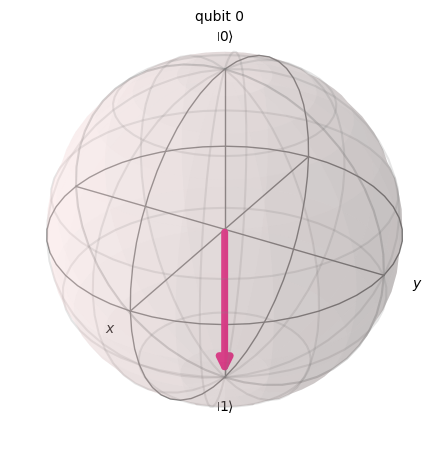

In [14]:
from qiskit.visualization import plot_bloch_multivector

plot_bloch_multivector(statevector)

# More qubits... ⚛️⚛️

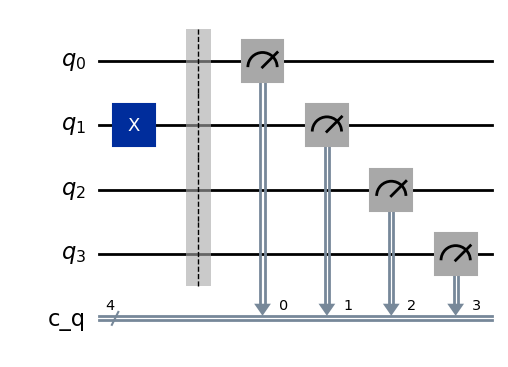

In [15]:
n_qubits = 4

q = QuantumRegister(4, 'q')
c_q = ClassicalRegister(4, 'c_q')

qc = QuantumCircuit(q, c_q)

qc.x(1)
qc.barrier()

qc.measure(q, c_q)

qc1 = QuantumCircuit(4)
qc1.x(1)
qc1.measure_all()


qc.draw('mpl')

In [16]:
simulator = StatevectorSimulator()
result = simulator.run(qc).result()
statevector = result.get_statevector()

print(statevector)

Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))


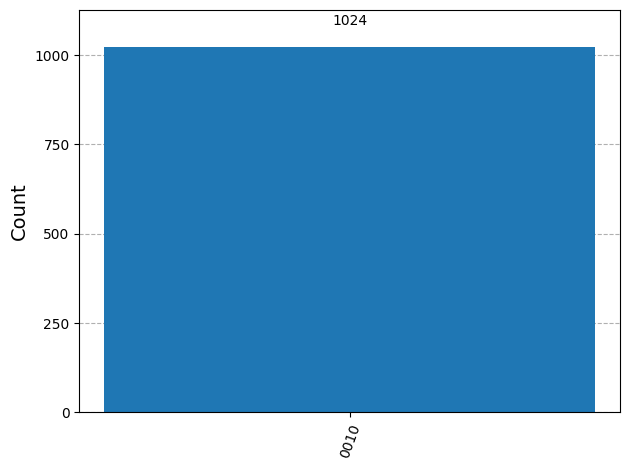

In [17]:
simulator = AerSimulator()
result = simulator.run(qc, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)

## Take away message: 

Qiskit combines the four quantum bits in the following order:

$$ q[3], q[2], q[1], q[0] .$$

Then, each outcome is read in the same order.

The outcome is a binary number, and so the first digit is expected to be the most significant bit and the last digit is expected to be the least significant bit.

For example, $ 13 =  \mathbf{1} \cdot 2^3 + \mathbf{1} \cdot 2^2 + \mathbf{0} \cdot 2^1 + \mathbf{1} \cdot 2^0 $, which is equal to $ \mathbf{1101} $ in binary.

In this case, $ c_q[3] = 1 $, $ c_q[2] = 1 $, $ c_q[1] = 0 $, and $ c_q[0] = 1$. 

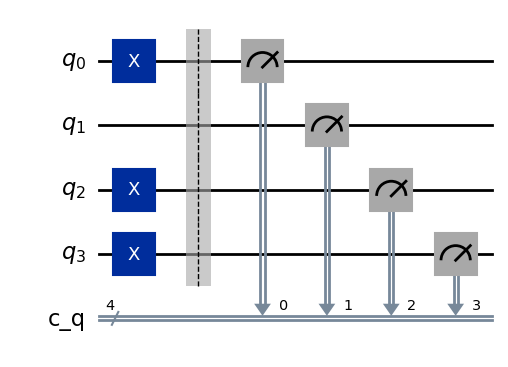

In [18]:
n_qubits = 4

q = QuantumRegister(4, 'q')
c_q = ClassicalRegister(4, 'c_q')

qc = QuantumCircuit(q, c_q)

qc.x(0)
qc.x(2)
qc.x(3)
qc.barrier()

qc.measure(q, c_q)
qc.draw('mpl')

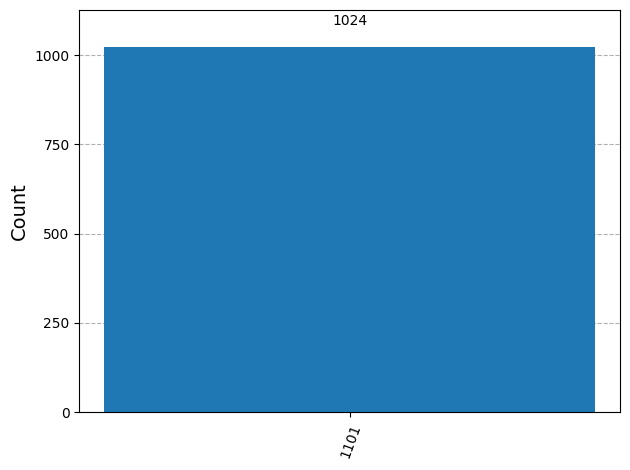

In [19]:
simulator = AerSimulator()
result = simulator.run(qc, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)

# Controlled Gate! 👀

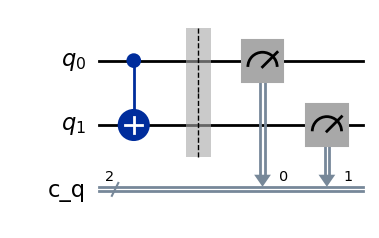

In [20]:
q = QuantumRegister(2,'q')
c_q = ClassicalRegister(2, 'c_q')
qc = QuantumCircuit(q, c_q)

CXGate = XGate().control(1)
qc.append(CXGate, [q[0], q[1]])

qc.barrier()
qc.measure(q, c_q)

qc.draw('mpl')

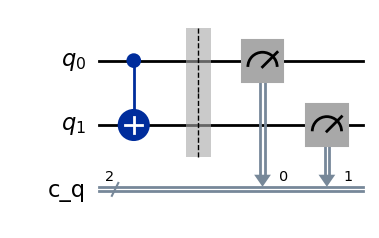

In [21]:
q = QuantumRegister(2,'q')
c_q = ClassicalRegister(2, 'c_q')
qc = QuantumCircuit(q, c_q)

qc.cx(q[0], q[1])

qc.barrier()
qc.measure(q, c_q)

qc.draw('mpl')

### What is the result of the previous circuit?

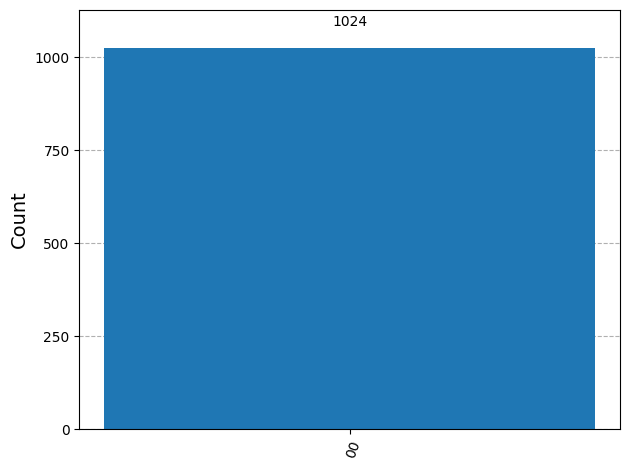

In [22]:
simulator = AerSimulator()
result = simulator.run(qc, shots=1024).result()
counts = result.get_counts()

plot_histogram(counts)

## Again! 🔥

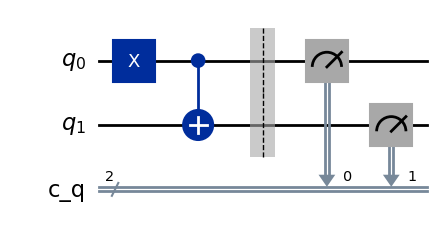

In [23]:
q = QuantumRegister(2,'q')
c_q = ClassicalRegister(2, 'c_q')
qc = QuantumCircuit(q, c_q)

qc.x(0)
qc.cx(q[0], q[1])

qc.barrier()
qc.measure(q, c_q)

qc.draw('mpl')

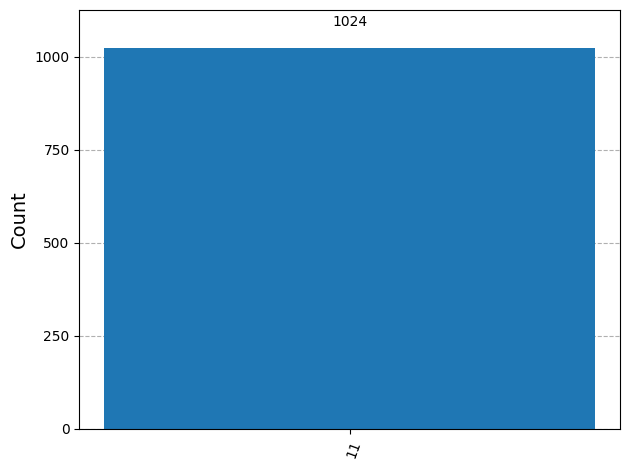

In [24]:
simulator = AerSimulator()
result = simulator.run(qc, shots=1024).result()
counts = result.get_counts()

plot_histogram(counts)

# Multi-Controlled Gate! 👀👀

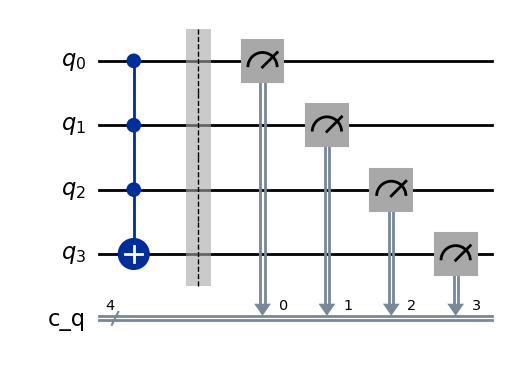

In [25]:
n_qubits = 4
control_qubits = 3

q = QuantumRegister(n_qubits, 'q')
c_q = ClassicalRegister(n_qubits, 'c_q')

qc = QuantumCircuit(q, c_q)

MCXGate = XGate().control(control_qubits)

qc.append(MCXGate, [q[0], q[1], q[2], q[3]])

qc.barrier()
qc.measure(q, c_q)
qc.draw('mpl')

# <center> A wild H Gate appeared! 💥 </center>
<center><div>
<img src="./images/wildHGate.jpeg" width="350"/>
</center></div>

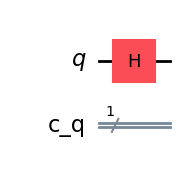

In [26]:
from qiskit.circuit.library import HGate

q = QuantumRegister(1, 'q')
c_q = ClassicalRegister(1, 'c_q')

qc = QuantumCircuit(q, c_q)

qc.append(HGate(), [q[0]])
#qc.h(0)

qc.draw('mpl')


In [27]:
simulator = StatevectorSimulator()
result = simulator.run(qc).result()
statevector = result.get_statevector()

print(statevector)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


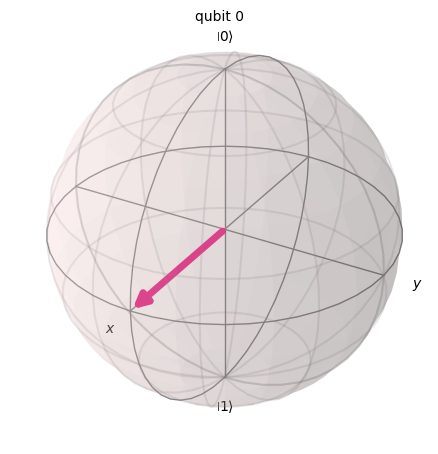

In [28]:
plot_bloch_multivector(statevector)

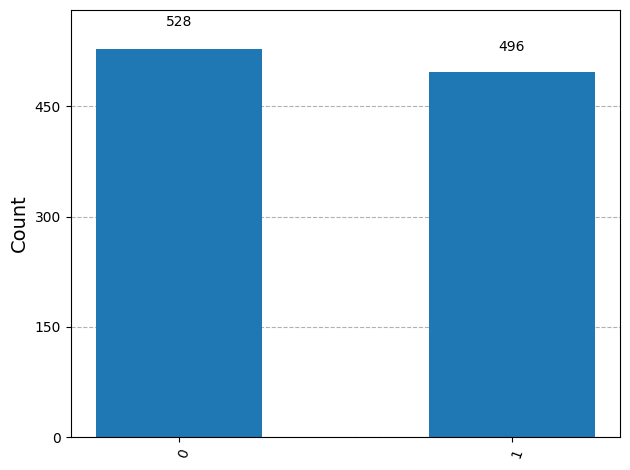

In [29]:
qc.measure(q, c_q)
simulator = AerSimulator()
result = simulator.run(qc, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)

## Every gate can be multi-controlled!

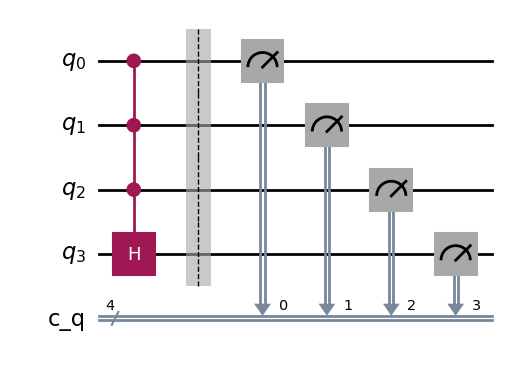

In [30]:
n_qubits = 4
control_qubits = 3

q = QuantumRegister(n_qubits, 'q')
c_q = ClassicalRegister(n_qubits, 'c_q')

qc = QuantumCircuit(q, c_q)

MCXGate = HGate().control(control_qubits)

qc.append(MCXGate, [q[0], q[1], q[2], q[3]])

qc.barrier()
qc.measure(q, c_q)
qc.draw('mpl')

# Be careful to abstractions...

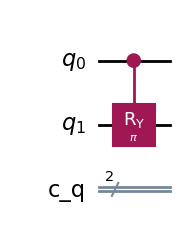

In [31]:
import numpy as np
from qiskit.circuit.library import RYGate

q = QuantumRegister(2,'q')
c_q = ClassicalRegister(2,'c_q')

quantum_circuit = QuantumCircuit(q, c_q)

CRGate = RYGate(np.pi).control(1)
quantum_circuit.append(CRGate, [q[0], q[1]])
quantum_circuit.draw('mpl')

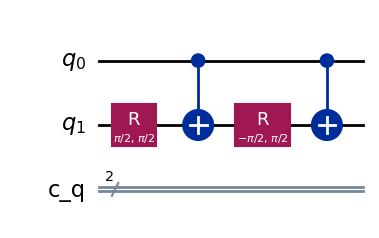

In [32]:
quantum_circuit.decompose(reps=2).draw('mpl')

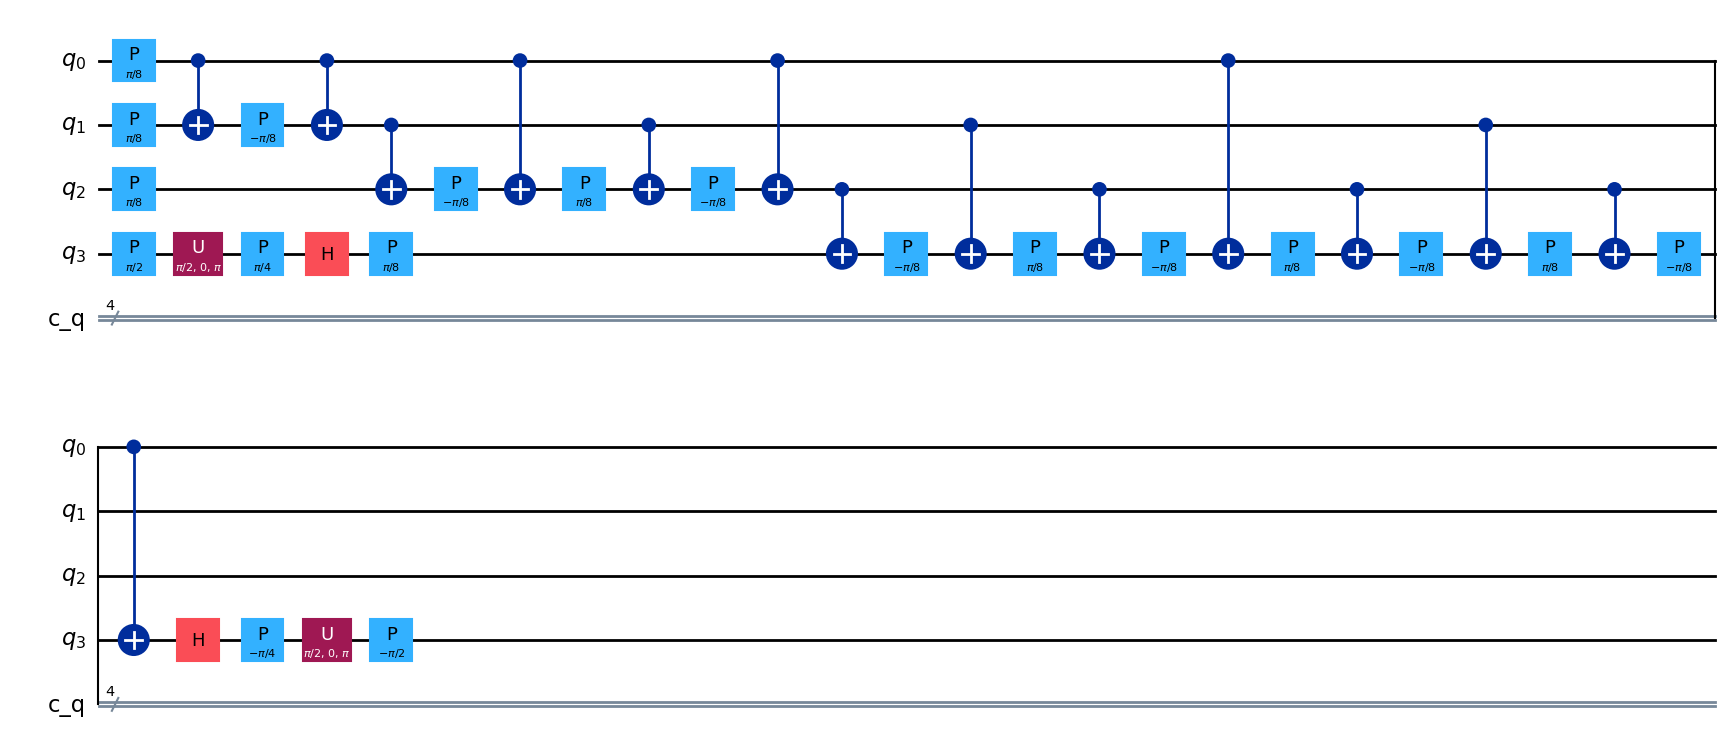

In [33]:
n_qubits = 4
control_qubits = 3

q = QuantumRegister(n_qubits, 'q')
c_q = ClassicalRegister(n_qubits, 'c_q')

qc = QuantumCircuit(q, c_q)

MCXGate = HGate().control(control_qubits)

qc.append(MCXGate, [q[0], q[1], q[2], q[3]])

qc = qc.decompose(reps=2)
qc.draw('mpl')

# Let's Entangle! Bell states

- The Bell's states  are specific quantum states of two qubits that represent the simplest examples of quantum entanglement. 


A quantum state $\ket{e}$ is entangled if there are no two states $\ket{\psi}, \ket{\phi}$ such that $\ket{\psi}\otimes\ket{\phi} = \ket{e}$

![display image](https://cdn-images-1.medium.com/v2/resize:fill:1600:480/gravity:fp:0.5:0.4/0*jYK3ugRdQGFYRCsY.gif)

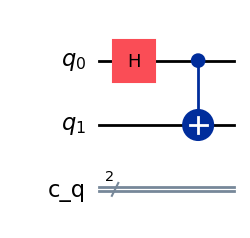

In [34]:
q = QuantumRegister(2,'q')
c_q = ClassicalRegister(2,'c_q')

quantum_circuit = QuantumCircuit(q, c_q)

quantum_circuit.append(HGate(), [q[0]])

CXGate = XGate().control(1)
quantum_circuit.append(CXGate, [q[0], q[1]])
quantum_circuit.draw('mpl')


In [35]:
simulator = StatevectorSimulator()
result = simulator.run(quantum_circuit).result()
statevector = result.get_statevector()
print(statevector)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


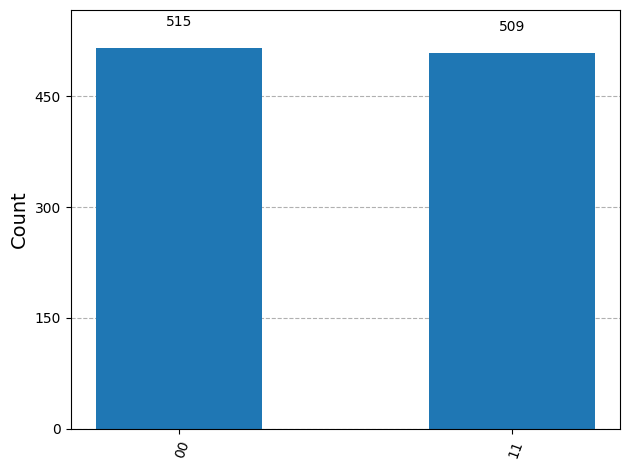

In [36]:
quantum_circuit.measure(q, c_q)
simulator = AerSimulator()
result = simulator.run(quantum_circuit, shots=1024).result()
counts = result.get_counts()

plot_histogram(counts)

## Let's do the same without Qiskit 

In [37]:
I = np.eye(2, dtype=complex)
H = 1/np.sqrt(2)*np.ones([2,2], dtype=complex)
H[1,1] *= -1
X = np.array([[0,1],[1,0]])

ket0 = np.array([[1],[0]])
bra0 = np.conj(ket0.T)

# |0><0|
print(ket0*bra0)

[[1 0]
 [0 0]]


In [38]:
ket1 = np.array([[0],[1]])
bra1 = np.conj(ket1.T)

# |0><0|
print(ket1*bra1)

[[0 0]
 [0 1]]


In [39]:
CX = np.kron(ket0 * bra0, I) + np.kron(ket1*bra1, X)
print(CX.real)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


In [40]:
HxI = np.kron(H, I)
bell_maker_unitary = CX.dot(HxI)

In [41]:
ket00 = np.array([[1],[0],[0],[0]])
bell_state = bell_maker_unitary.dot(ket00)
print(bell_state)

[[0.70710678+0.j]
 [0.        +0.j]
 [0.        +0.j]
 [0.70710678+0.j]]


In [42]:
base = np.array([[0],[0],[0],[1]])
measurement_11_operator  = base*np.conj(base.T)

#<bell_state|Measuremet11|bell_state>
output = np.conj(bell_state.T).dot(measurement_11_operator).dot(bell_state)
print(output)

[[0.5+0.j]]


# Ok, I prefer Qiskit 😅





# <center> Let's run our quantum algorithm on a REAL quantum computer 🔥 </center>
<div>
<img src="./images/quantum_computer.jpg" width="1000"/>
</div>

In [ ]:
# create an account at https://cloud.ibm.com
# follow instructions at https://quantum.cloud.ibm.com/docs/en/guides/cloud-setup

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

your_token = ''
your_instance = ''
# Save an IBM Quantum account.
QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform",
    token=your_token,
    instance=your_instance,
    overwrite=True
)



In [45]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Initialize your account (once saved)
service = QiskitRuntimeService()

service.backends()

[<IBMBackend('ibm_fez')>,
 <IBMBackend('ibm_marrakesh')>,
 <IBMBackend('ibm_torino')>]

In [48]:
real_device = service.backend("ibm_torino")

## Let's send to the quantum computer the circuit that creates a Bell's pair

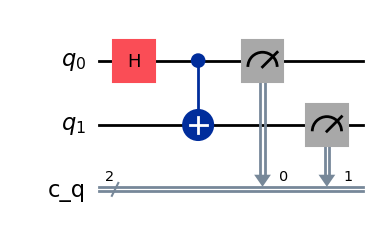

In [46]:
q = QuantumRegister(2,'q')
c_q = ClassicalRegister(2,'c_q')

quantum_circuit = QuantumCircuit(q, c_q)

#--------------------------------------------
quantum_circuit.append(HGate(),  [q[0]]) 

CXGate = XGate().control(1) 
quantum_circuit.append(CXGate, [q[0], q[1]]) 

quantum_circuit.measure(q, c_q) 
#--------------------------------------------

quantum_circuit.draw('mpl')

In [50]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Session

pm = generate_preset_pass_manager(backend=real_device, optimization_level=1)
circuit = pm.run(quantum_circuit)

sampler = Sampler(mode=real_device)
job = sampler.run([circuit])
pub_result = job.result()[0]
print(f"Counts: {pub_result.data.c_q.get_counts()}")
 

Counts: {'10': 307, '00': 1926, '11': 1592, '01': 271}


{'10': 307, '00': 1926, '11': 1592, '01': 271}


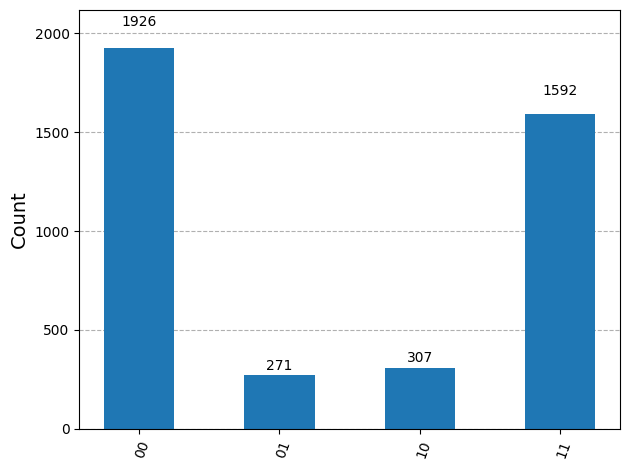

In [51]:
print(pub_result.data.c_q.get_counts())
plot_histogram(pub_result.data.c_q.get_counts())

In [52]:
print(job.status())
print(job.usage_estimation)

DONE
{'quantum_seconds': 2.49851103}


<h2>..or use the real noise information locally <h2>

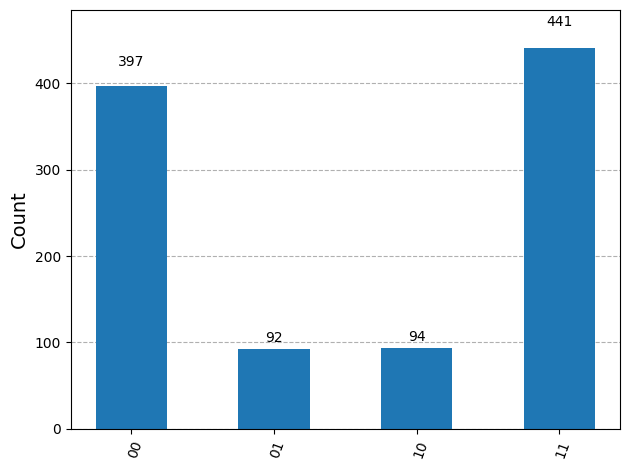

In [ ]:
from qiskit_aer.noise import NoiseModel

noisy_backend = service.backend("ibm_torino")
noise_model = NoiseModel.from_backend(noisy_backend)
noisy_simulator = AerSimulator(noise_model=noise_model)
 
counts = noisy_simulator.run(circuit).result().get_counts()
plot_histogram(counts)


# Let's play with the composer

https://quantum.ibm.com/composer/